# Gradient descent for linear regression
with an  arbitrary number of features, learning rate, epochs and batch size

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def gradient_descent(X, y, learning_rate=1, batch_size=None, epochs=None):
    X = np.array(X)
    y = np.array(y)

    n_samples = X.shape[0]

    try:
        n_features = X.shape[1]
    except IndexError:
        n_features = 1
        X = np.reshape(X, (-1, 1))

    # initialize weights at random
    w = 2*np.random.rand(n_features) - 1
    b = 2*np.random.rand() - 1

    # select batch
    # todo

    for i in range(epochs): #will need to change when taking batches
        print(w,b)
        # compute predictions, loss and gradient
        y_pred = np.dot(X, w) + b
        delta = y_pred - y
        loss = np.dot(delta, delta) / n_samples # replace with batch size
        print(loss)
        print('\n')
        w -= learning_rate * 2 * np.dot(delta, X) / n_samples # replace with batch size
        b -= learning_rate * 2 * np.sum(delta) / n_samples # replace with batch size


    # print(w, b)
    # print(y_pred)
    # print(y)
    # print(delta)
    # print(avg_grad)

In [47]:
def gradient_descent(X, y, learning_rate=1, batch_size=None, epochs=100):
    X = np.array(X)
    y = np.array(y)

    n_samples = X.shape[0]
    if batch_size == None:
        batch_size = n_samples

    try:
        n_features = X.shape[1]
    except IndexError:
        n_features = 1
        X = np.reshape(X, (-1, 1))

    # initialize weights at random
    w = 2*np.random.rand(n_features) - 1
    b = 2*np.random.rand() - 1

    # keep track of loss
    loss_history = np.zeros((epochs, 2))

    for i in range(epochs):
        # create batches
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        n_batches = len(X) // batch_size
        X_batches = np.array_split(X_shuffled[:n_batches * batch_size], n_batches)
        y_batches = np.array_split(y_shuffled[:n_batches * batch_size], n_batches)

        for j in range(n_batches):
            X_batch = X_batches[j]
            y_batch = y_batches[j]

            # compute predictions, loss and gradient
            y_pred = np.dot(X_batch, w) + b
            delta = y_pred - y_batch
            loss = np.dot(delta, delta) / batch_size
            w -= learning_rate * 2 * np.dot(delta, X_batch) / batch_size
            b -= learning_rate * 2 * np.sum(delta) / batch_size

            # print report
            if j == n_batches - 1:
                loss_history[i] = np.array([i, loss])

    return w, b, loss_history


    # print(w, b)
    # print(y_pred)
    # print(y)
    # print(delta)
    # print(avg_grad)

should raise error if:
- x and y sizes are mismatched
- y is 2+D
- x[i] sizes are different -- numpy raises error in np.array(x)
- x.shape has 3+ items (3D array)
- batch size <1 or >samples or not int
- learning rate <=0
- epochs not int or <=0

In [63]:
def plot_model(X, y, w, b, hist):
    # plot points and lines
    X = np.array(X)
    y = np.array(y)
    try:
        n_features = X.shape[1]
    except IndexError:
        n_features = 1
        X = np.reshape(X, (-1, 1))

    fig, axs = plt.subplots(1, n_features)

    for i in range(n_features):
        try:
            ax = axs[i]
        except TypeError:
            ax = axs

        ax.set_xlabel(f'x[{i}]')
        ax.set_ylabel('y')

        ax.scatter(X[:, i], y)

        # x0 = X[:, i].min()
        # y0 = b + (w[i] * x0)
        # x1 = X[:, i].max()
        # y1 = b + (w[i] * x1)

        i0 = X[:, i].argmin()
        x0 = X[i0, i]
        y0 = b + np.dot(w, X[i0])
        i1 = X[:, i].argmax()
        x1 = X[i1, i]
        y1 = b + np.dot(w, X[i1])
        ax.plot([x0, x1], [y0, y1], c='r')

    # plot loss
    fig2, ax2 = plt.subplots(1, 1)
    ax2.plot(hist[:, 0], hist[:, 1])

    plt.show()

In [29]:
# gradient_descent([1,2,3], [4,5,7], learning_rate=0.05, epochs=100)
gradient_descent([[1,2,3], [5,6,6], [7,6,5]], [3,4,5], learning_rate=0.004, epochs=10000)


(array([ 0.70854285, -0.77231047,  0.41927904]),
 2.576845675650748,
 [58.73632557968352,
  10.520640242946444,
  2.180162814553262,
  0.7369782538895929,
  0.4868338025862404,
  0.4430539644065858,
  0.43497155976200047,
  0.4330659213125447,
  0.4322307635130116,
  0.43158280386640285,
  0.4309692216977851,
  0.43036354662907234,
  0.4297611642358406,
  0.4291612414393793,
  0.4285636000853426,
  0.4279681761392344,
  0.4273749261214938,
  0.42678381090298984,
  0.42619479288220646,
  0.4256078354775774,
  0.4250229030207679,
  0.4244399607197791,
  0.4238589746345927,
  0.42327991165543494,
  0.42270273948193404,
  0.42212742660285674,
  0.4215539422763644,
  0.42098225651076565,
  0.42041234004575134,
  0.4198441643341002,
  0.41927770152384075,
  0.4187129244408599,
  0.4181498065719518,
  0.41758832204828494,
  0.4170284456292885,
  0.41647015268693727,
  0.4159134191904362,
  0.41535822169128195,
  0.41480453730870614,
  0.4142523437154744,
  0.41370161912404874,
  0.41315234227

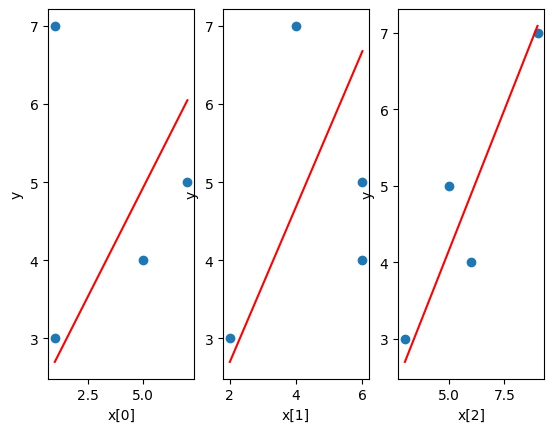

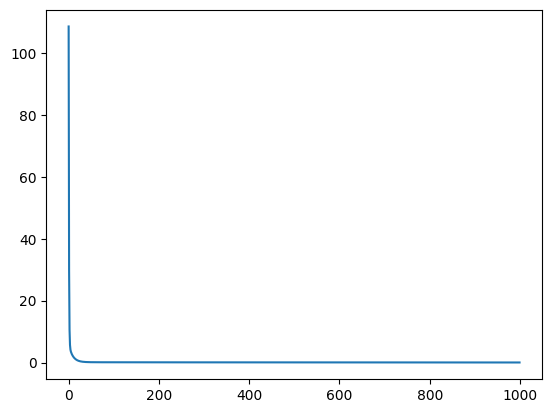

[-0.06094928  0.6754415   0.50719223] -0.11347571701723713


In [80]:
my_feature = np.array([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = np.array([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

# w, b, hist = gradient_descent(my_feature, my_label, learning_rate=0.001, epochs=500, batch_size=3)
# plot_model(my_feature, my_label, w, b, hist)

# w, b, hist = gradient_descent([[1,2], [5,6], [7,8]], [3,4,5], learning_rate=0.004, epochs=10000)
# plot_model([[1,2], [5,6], [7,8]], [3,4,5], w, b, hist)
# print(w,b)

w, b, hist = gradient_descent([[1,2,3], [5,2,6], [7,6,5], [1,4,9]], [3,4,6,7], learning_rate=0.004, epochs=1000)
plot_model([[1,2,3], [5,6,6], [7,6,5], [1,4,9]], [3,4,5,7], w, b, hist)
print(w,b)